In [20]:
import requests
import asyncio

In [21]:
string = '?string=hello%20and%20goodmorrrrrninnnng'
batch_url = 'http://localhost:8080/batch'
element_url = 'http://localhost:8080/element'

In [22]:
%%time

requests.get(element_url + string).json()

CPU times: user 6.22 ms, sys: 537 µs, total: 6.75 ms
Wall time: 196 ms


{'negative': 0.008433783426880836, 'positive': 0.9915662407875061}

In [23]:
%%time

requests.get(batch_url + string).json()

CPU times: user 5.88 ms, sys: 0 ns, total: 5.88 ms
Wall time: 298 ms


{'negative': 0.008433783426880836, 'positive': 0.9915662407875061}

In [24]:
# !pip3 install grequests

In [25]:
import grequests

def concurrent(url, n = 50):
    rs = (grequests.get(url + string + str(no)) for no in range(n))
    return grequests.map(rs)

In [26]:
%%time

concurrent(element_url, n = 50)

CPU times: user 182 ms, sys: 10.5 ms, total: 192 ms
Wall time: 6.51 s


[<Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>]

In [27]:
%%time

concurrent(batch_url, n = 50)

CPU times: user 139 ms, sys: 10.9 ms, total: 150 ms
Wall time: 498 ms


[<Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>]

In [29]:
import time
x = [1, 10, 25, 50, 100, 200, 500]

In [15]:
y = []
for i in x:
    print(i)
    before = time.time()
    concurrent(element_url, n = i)
    y.append(time.time() - before)

1
10
25
50
100
200
500


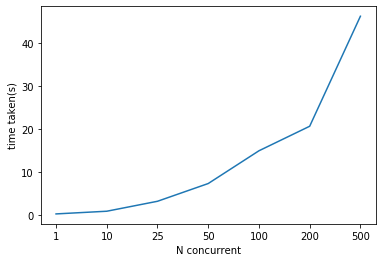

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(y)
plt.ylabel('time taken(s)')
plt.xlabel('N concurrent')
plt.xticks(np.arange(len(x)), x)
plt.show()

In [30]:
import time

y = []
for i in x:
    print(i)
    before = time.time()
    concurrent(batch_url, n = i)
    y.append(time.time() - before)

1
10
25
50
100
200
500


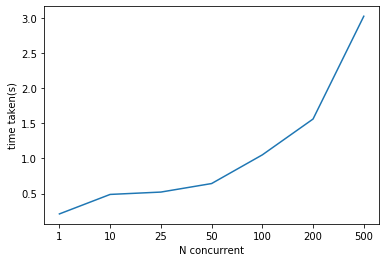

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(y)
plt.ylabel('time taken(s)')
plt.xlabel('N concurrent')
plt.xticks(np.arange(len(x)), x)
plt.show()